<a href="https://colab.research.google.com/github/Sarthak2578/restaurants-n-moods/blob/main/Restaurant_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import geopy
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Moods_and_cuisines.csv to Moods_and_cuisines.csv
Saving zomato_indore.csv to zomato_indore.csv


# Making dataframes

In [ ]:
import io

df1 = pd.read_csv(io.BytesIO(uploaded['zomato_indore.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['Moods_and_cuisines.csv']))

# General description regarding datasets

In [ ]:
print(df1.shape)

(2850, 10)


In [ ]:
print(df2.shape)

(2851, 2)


In [ ]:
print(df1.describe)

<bound method NDFrame.describe of       S_no                                           name  \
0        0                                  Namo Sandwich   
1        1                                   Bake N Shake   
2        2                                Shree Gurukripa   
3        3                              Nafees Restaurant   
4        4                               Hotel Guru Kripa   
...    ...                                            ...   
2845  2953               One Asia - Indore Marriott Hotel   
2846  2954                      Constellation - Hotel WOW   
2847  2955                    Ni Hao - Radisson Blu Hotel   
2848  2956                Indiya Oye - Radisson Blu Hotel   
2849  2957  Indore Baking Company - Indore Marriott Hotel   

                                locality   latitude  longitude  \
0                           Sudama Nagar  22.696331  75.834857   
1               BCM Heights, Vijay Nagar  22.755705  75.895287   
2                      Sarwate Bus 

In [ ]:
print(df2.describe)

<bound method NDFrame.describe of           mood      cuisines
0      Excited   Finger Food
1      Anxious  South Indian
2      Excited        French
3         Hurt          Cafe
4        Happy  North Indian
...        ...           ...
2846  Ecstatic       Seafood
2847     Happy  North Indian
2848       Sad         Momos
2849      Hurt       Arabian
2850   Anxious      Bar Food

[2851 rows x 2 columns]>


In [ ]:
df1.isnull()

S_no   name  locality  latitude  longitude  cuisines  \
0     False  False     False     False      False     False   
1     False  False     False     False      False     False   
2     False  False     False     False      False     False   
3     False  False     False     False      False     False   
4     False  False     False     False      False     False   
...     ...    ...       ...       ...        ...       ...   
2845  False  False     False     False      False     False   
2846  False  False     False     False      False     False   
2847  False  False     False     False      False     False   
2848  False  False     False     False      False     False   
2849  False  False     False     False      False     False   

      average_cost_for_two  aggregate_rating  votes  rating_text  
0                    False             False  False        False  
1                    False             False  False        False  
2                    False             False  False        False  
3                    False             False  False        False  
4                    False             False  False        False  
...                    ...               ...    ...          ...  
2845                 False             False  False        False  
2846                 False             False  False        False  
2847                 False             False  False        False  
2848                 False             False  False        False  
2849                 False             False  False        False  

[2850 rows x 10 columns]

In [ ]:
print(df1.isnull().sum())

S_no                    0
name                    0
locality                0
latitude                0
longitude               0
cuisines                0
average_cost_for_two    0
aggregate_rating        0
votes                   0
rating_text             0
dtype: int64


In [ ]:
df2.isnull()

mood  cuisines
0     False     False
1     False     False
2     False     False
3     False     False
4     False     False
...     ...       ...
2846  False     False
2847  False     False
2848  False     False
2849  False     False
2850  False     False

[2851 rows x 2 columns]

In [ ]:
print(df2.isnull().sum())

mood        0
cuisines    0
dtype: int64


# Visualisation

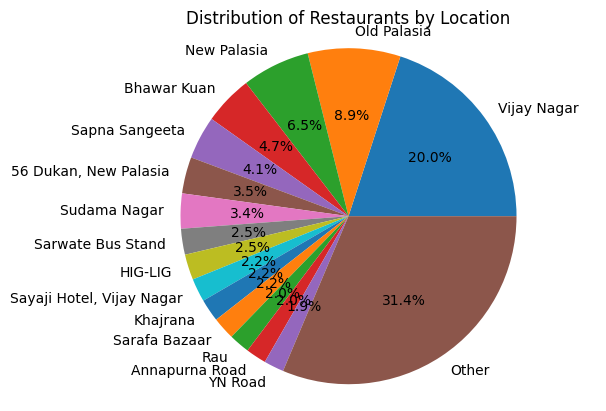

In [ ]:
#PIE CHART - LOCATION WISE

location_counts = df1['locality'].value_counts()

#Creating a list of the top 15 locations and their counts
top_locations = location_counts[:15].tolist()
top_labels = location_counts[:15].index.tolist()

#Combining the remaining locations into an "Other" category
other_count = location_counts[15:].sum()
top_locations.append(other_count)
top_labels.append('Other')

#Creating the pie chart
plt.pie(top_locations, labels=top_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Restaurants by Location')
plt.show()

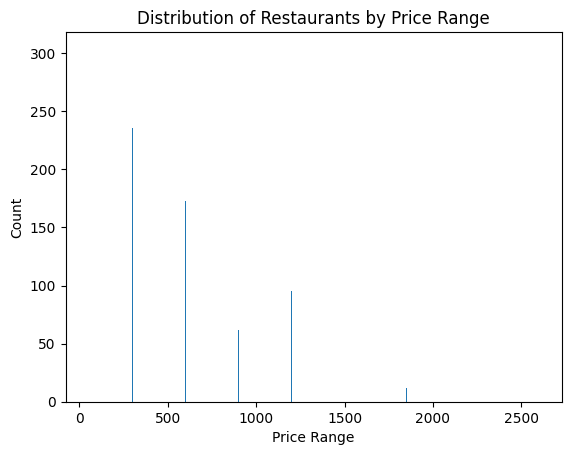

In [ ]:
#BAR CHART - AVERAGE COST FOR TWO PEOPLE

price_counts = df1['average_cost_for_two'].value_counts()
plt.bar(price_counts.index, price_counts.values)
plt.title('Distribution of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

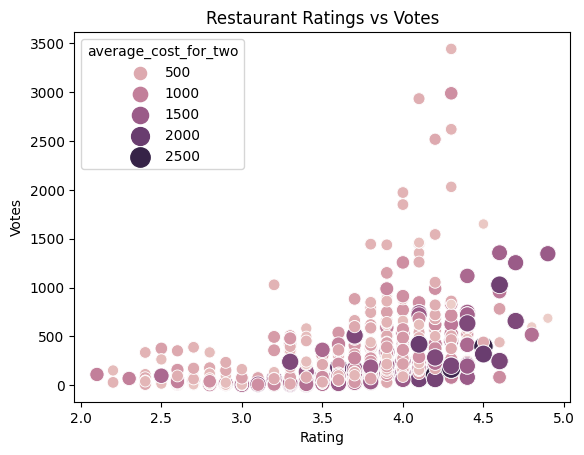

In [ ]:
#SCATTER PLOT
import seaborn as sns

sns.scatterplot(data=df1, x='aggregate_rating', y='votes', hue='average_cost_for_two', size='average_cost_for_two', sizes=(50, 200))

# Set the title and axis labels
plt.title('Restaurant Ratings vs Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')

# Show the chart
plt.show()

In [ ]:
import folium

# Create a map centered at the mean of the restaurant locations
center = [df1['latitude'].mean(), df1['longitude'].mean()]
m = folium.Map(location=center, zoom_start=12)

# Add markers to the map for each restaurant
for index, row in df1.iterrows():
    tooltip = row['name']
    popup = 'Cuisine: {}<br>Location: {}<br>Price Range: {}'.format(row['cuisines'], row['locality'], row['average_cost_for_two'])
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip, popup=popup).add_to(m)

# Display the map
m

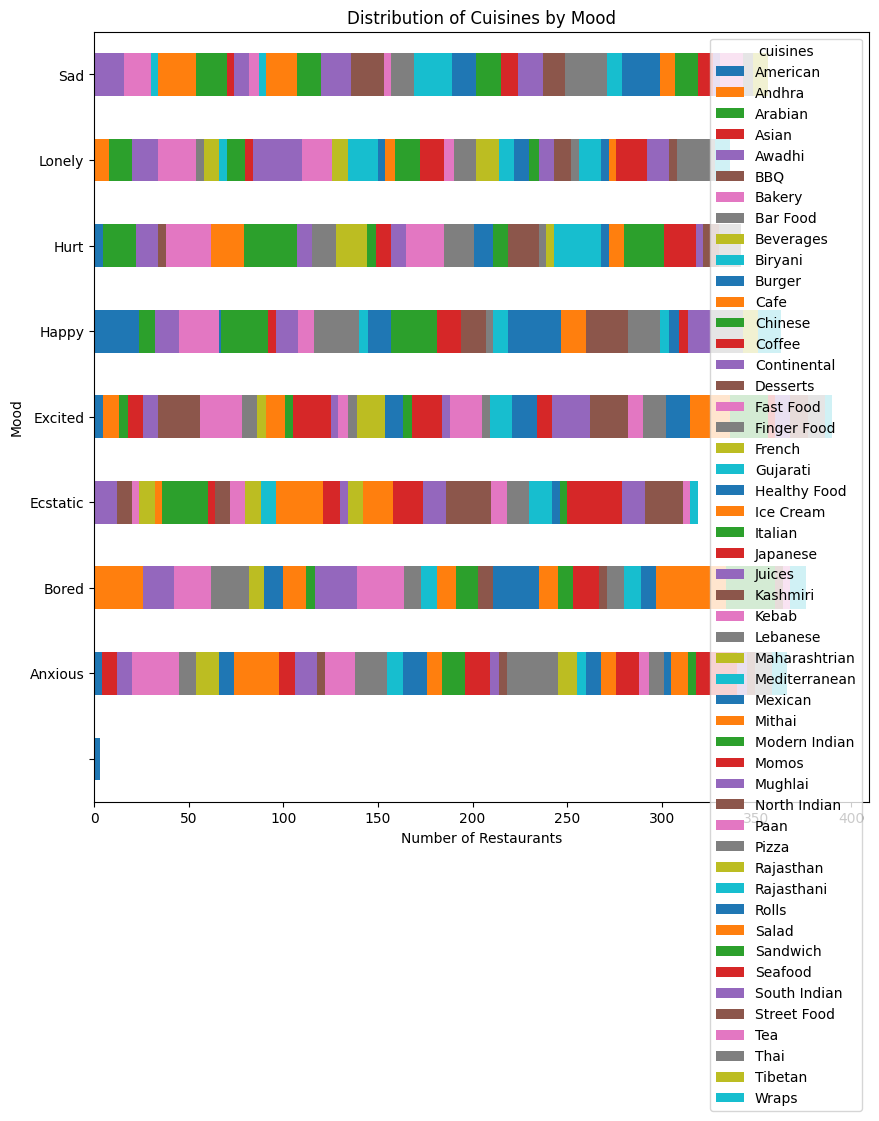

In [ ]:
#STACKED BAR CHART

grouped_data = df2.groupby(['mood', 'cuisines']).size().unstack()

#create chart
ax = grouped_data.plot(kind='barh', stacked=True, figsize=(10, 10))
ax.set_xlabel('Number of Restaurants')
ax.set_ylabel('Mood')
ax.set_title('Distribution of Cuisines by Mood')
plt.show()

# Taking only the primary cuisine from all the cuisines the restaurant serves

In [ ]:
cuisine_info = df1['cuisines']
main_cuisine = []

for string in cuisine_info:
  main_cuisine.append(string.split(",")[0])

df1['primary_cuisine'] = main_cuisine

# Pre processing the dataframes

In [ ]:
df1 = df1.loc[df1['longitude'] != 0, :]
df1 = df1.loc[df1['latitude'] != 0, :]
rating_dict = {"Excellent": 5, "Very Good": 4, "Good": 3, "Average": 2, "Poor": 1}
df1 = df1[df1['rating_text'].isin(rating_dict.keys())]
df1['rating_num'] = df1['rating_text'].map(rating_dict)
df1 = df1.drop(['votes', 'cuisines', 'longitude', 'latitude', 'S_no'], axis=1)

df2 = df2.loc[df2['mood'] != '      ', :]

In [ ]:
df1.corr()

<ipython-input-19-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


average_cost_for_two  aggregate_rating  rating_num
average_cost_for_two              1.000000          0.326779    0.329200
aggregate_rating                  0.326779          1.000000    0.936581
rating_num                        0.329200          0.936581    1.000000

# Creating the recommendation system


In [ ]:
moods = df2.mood.unique()

mood_dict = {}
for mood in moods:
  df_mood = df2.loc[df2.mood == mood]
  mood_dict[mood] = list(df_mood.cuisines.values)

  total_cuisines = df2.cuisines.unique()

  import pprint
  pprint.pprint(mood_dict)

Streaming output truncated to the last 5000 lines.
           'Burger',
           'Momos',
           'Rajasthani',
           'Ice Cream',
           'Continental',
           'Mithai',
           'Andhra',
           'Sandwich',
           'Finger Food',
           'Wraps',
           'Awadhi',
           'Salad',
           'Continental',
           'Finger Food',
           'Wraps',
           'Awadhi',
           'Salad',
           'Continental',
           'Fast Food',
           'Continental',
           'Momos',
           'Salad',
           'Andhra',
           'Awadhi',
           'Mexican',
           'Salad',
           'Andhra',
           'Awadhi',
           'Mexican',
           'Rolls',
           'Tea',
           'Sandwich',
           'Cafe',
           'Bakery',
           'Gujarati',
           'Modern Indian',
           'Bar Food',
           'Andhra',
           'Sandwich',
           'North Indian',
           'Gujarati',
           'Modern Indian',
       

In [ ]:
user_input = input("What's your mood: ")
found_cuisines = mood_dict[user_input]
df_restaurants = df1.loc[df1.primary_cuisine.isin(set(found_cuisines))]

What's your mood: Sad


In [ ]:
user_locality = input('Enter your locality: ')
df_restaurants = df_restaurants.loc[(df_restaurants['locality'] == user_locality)]

Enter your locality: Vijay Nagar


In [ ]:
price_factor = input('Is price a factor? (Yes/No): ')

Is price a factor? (Yes/No): Yes


In [ ]:
weight_price = 0.6
weight_rating = 0.4

max_price = df_restaurants['average_cost_for_two'].max()
df_restaurants['normalized_price'] = df_restaurants['average_cost_for_two']/max_price

max_rating = df_restaurants['aggregate_rating'].max()
df_restaurants['normalized_rating'] = df_restaurants['aggregate_rating']/max_rating

df_restaurants['weighted_score'] = weight_price * df_restaurants['normalized_price'] + weight_rating * df_restaurants['normalized_rating']

df_restaurants = df_restaurants.sort_values(by='weighted_score', ascending=False)

In [ ]:
df_restaurants = df_restaurants.drop(['locality', 'normalized_price', 'normalized_rating', 'weighted_score'], axis=1)

In [ ]:
if price_factor == 'Yes':
  print(df_restaurants.drop_duplicates(subset=['name'])[-6:-1])
else:
  print(df_restaurants.drop_duplicates(subset=['name'])[:5])

                              name  average_cost_for_two  aggregate_rating  \
277       Jay Mahakal Aloo Paratha                   100               3.0   
1333             Jay Mahakal Juice                   150               2.8   
461                Jain Bhojanalay                   150               2.8   
271   Amrit Shri Ice Cream Parlour                   100               2.9   
382             The Container Cafe                   300               2.2   

     rating_text primary_cuisine  rating_num  
277      Average    North Indian           2  
1333     Average          Juices           2  
461      Average    North Indian           2  
271      Average       Ice Cream           2  
382         Poor       Fast Food           1  


In [ ]:
df_restaurants.to_csv('model.csv')


In [ ]:
from sklearn.metrics import mean_squared_error

true_ratings = [5, 4, 3, 2, 1]
predicted_ratings = df_restaurants['rating_num'][:5].tolist()

mse = mean_squared_error(true_ratings, predicted_ratings)
rmse = np.sqrt(mse)
accuracy = (1 - rmse/5) * 100

print(f"RMSE: {rmse:.2f}")
print(f"Accuracy: {accuracy:.2f}%")